<a href="https://colab.research.google.com/github/verondel/data_analysis/blob/main/hw_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 5: Кластерный анализ

## libs


In [ ]:
import os
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster
import copy

## Подключение файла

In [ ]:
os.chdir("/content/drive/MyDrive/sem5_python/data")
filename = "marketing_campaign.csv"
df = pd.read_csv(filename, sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Подготовка данных

In [ ]:
df = df.dropna()

In [ ]:
# Возраст клиента
df["Age"] = 2023-df["Year_Birth"]

# Все траты
df["Spent"] = df["MntWines"] + df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

# Семейное положение
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})


<ipython-input-56-130034f1c5b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = 2023-df["Year_Birth"]
<ipython-input-56-130034f1c5b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Spent"] = df["MntWines"] + df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
<ipython-input-56-130034f1c5b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

## 3) Иерархическая кластеризация

In [ ]:
# Выбор признаков для кластеризации
features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_clustering = df[features]

# Иерархическая кластеризация
linkage_matrix = linkage(data_clustering, method='ward', metric='euclidean')

# method:
# Ward (минимизирует сумму квадратов различий во всех кластерах)
# Single linkage (метод ближайшего соседа)
# Complete linkage (метод наиболее удаленного соседа)
# Average linkage (метод среднего расстояния)

# Просмотр первых 5 строк созданного объекта linkage_matrix
linkage_matrix[:5]

array([[1.082e+03, 1.845e+03, 0.000e+00, 2.000e+00],
       [8.000e+00, 3.950e+02, 0.000e+00, 2.000e+00],
       [4.270e+02, 1.225e+03, 0.000e+00, 2.000e+00],
       [3.080e+02, 2.210e+03, 0.000e+00, 2.000e+00],
       [7.690e+02, 2.114e+03, 0.000e+00, 2.000e+00]])

**Вывод:** получилась иерархическая кластеризация на выборке данных, ограниченной набором признаков, связанных с расходами клиентов (таких как расходы на вина, фрукты, мясные продукты, рыбные продукты, сладости и золотые товары). Результатом является матрица связей linkage_matrix, где каждая строка представляет собой один шаг в процессе кластеризации

## 4) Построение дендрограммы

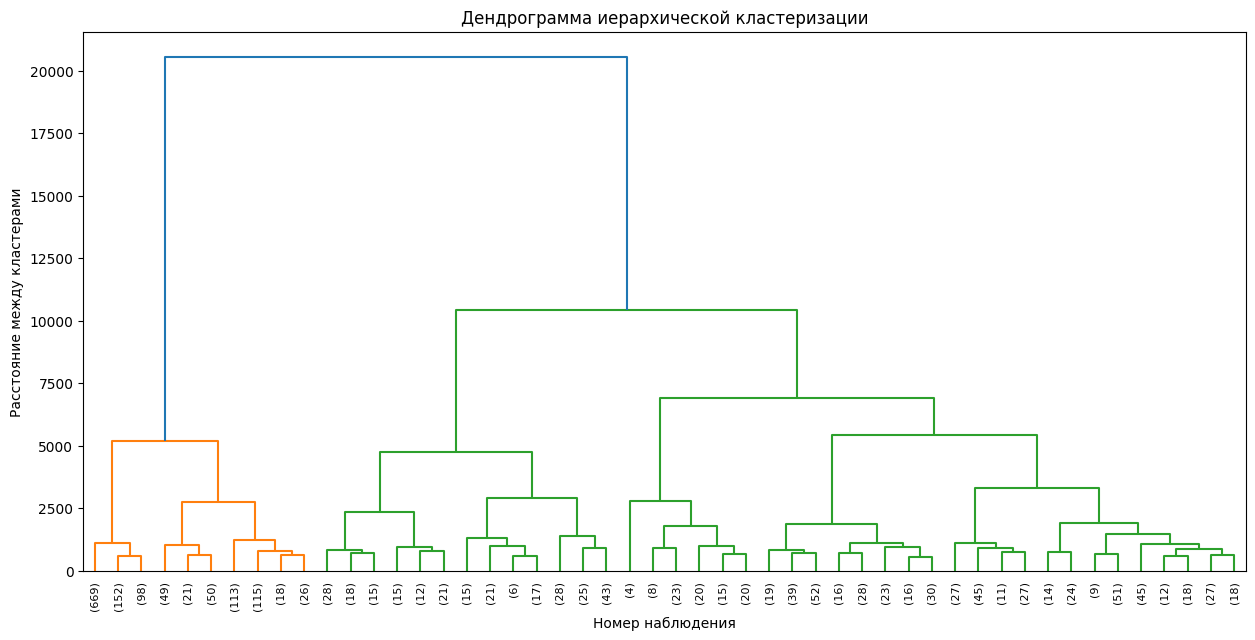

In [ ]:
# Построение дендрограммы
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=50, leaf_rotation=90., leaf_font_size=8.)
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Номер наблюдения')
plt.ylabel('Расстояние между кластерами')
plt.show()

**Вывод:**  разделение на 2-5 кластеров кажется оптимальным.

* Рассмотрение 2 кластеров предоставляет широкое разделение данных, но может не захватывать некоторые более тонкие структуры внутри данных.
* 3-5 кластеров предоставляют более детальное разделение, которое может быть полезно для более точного понимания различий между разными группами клиентов.

Рассмотрим разделение для 3 и 4 классов

## 5-6, 10 Присвоение номеров кластеров каждому объекту и анализ кластеров

In [ ]:
# Назначение номеров кластеров каждому объекту (3 кластера)
df['cluster'] = fcluster(linkage_matrix, 3, criterion='maxclust')

# Группировка по кластерам и вычисление средних значений
cluster_means = df.groupby('cluster').mean()
cluster_means

<ipython-input-59-bcecdce74592>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('cluster').mean()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent
cluster,,,,,,,,,,,,,,,,,,,,,
1,5604.443173,1969.993898,39208.700229,0.680397,0.553776,48.742182,90.495042,7.084668,34.207475,10.659802,...,0.032799,0.000763,0.006102,0.003814,0.011442,3.0,11.0,0.098398,53.006102,172.861175
2,5367.462121,1967.409091,75390.409091,0.079545,0.337121,50.636364,993.378788,53.011364,417.814394,71.772727,...,0.295455,0.409091,0.268939,0.075758,0.000000,3.0,11.0,0.397727,55.590909,1657.075758
3,5646.421217,1967.001560,69382.581903,0.102964,0.475819,48.897036,460.517941,54.792512,335.279251,78.755070,...,0.067083,0.082683,0.098284,0.007800,0.009360,3.0,11.0,0.154446,55.998440,1062.698908


In [ ]:
df.groupby('cluster')['Spent'].mean()

cluster
1     172.861175
2    1657.075758
3    1062.698908
Name: Spent, dtype: float64

In [ ]:
cluster_size = df.groupby('cluster').size()
cluster_size

cluster
1    1311
2     264
3     641
dtype: int64

1) **Кластер 1 (низкий доход, большие семьи):**
  * Средний доход в этом кластере самый низкий.
  * Самое большое количество детей и подростков в доме.
  * Средние расходы на вино, фрукты и мясные продукты ниже, чем в других кластерах.
  * Этот кластер может представлять семьи с более низким доходом и более высокими семейными обязательствами.

2) **Кластер 2 (высокий доход, любители вина):**
  * Самый высокий средний доход.
  * Наименьшее количество детей и подростков в доме.
  * Очень высокие расходы на вино, а также значительные траты на другие категории продуктов.
  * Самая высокая доля откликов на маркетинговые кампании.
  * Кластер может представлять более обеспеченных клиентов с особым интересом к вину.

3) **Кластер 3 (средний доход, умеренные траты):**
  * Средний доход между первым и вторым кластером.
  * Средние расходы на все категории продуктов.
  * Ниже, чем в кластере 2, но выше, чем в кластере 1, доля откликов на маркетинговые кампании.
  * Этот кластер может представлять клиентов со средним уровнем дохода, которые тратят умеренно на различные товары.


Разделение на три кластера позволяет более детально понять различия в потребительских привычках и демографических характеристиках клиентов. Мы видим группы с различными уровнями дохода и расходов, что может быть полезно для разработки целевых маркетинговых стратегий и предложений. Каждый кластер имеет свои уникальные черты, что позволяет предположить различные подходы к взаимодействию с клиентами в каждой

## 7-12 Разбиение на 4 кластера

In [ ]:
# Назначение номеров кластеров каждому объекту (4 кластера)
df_2 = copy.deepcopy(df)
df_2['cluster'] = fcluster(linkage_matrix, 4, criterion='maxclust')

# Группировка по кластерам и вычисление средних значений
cluster_means = df.groupby('cluster').mean()
cluster_means

<ipython-input-62-4449c4a3ef05>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('cluster').mean()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent
cluster,,,,,,,,,,,,,,,,,,,,,
1,5604.443173,1969.993898,39208.700229,0.680397,0.553776,48.742182,90.495042,7.084668,34.207475,10.659802,...,0.032799,0.000763,0.006102,0.003814,0.011442,3.0,11.0,0.098398,53.006102,172.861175
2,5367.462121,1967.409091,75390.409091,0.079545,0.337121,50.636364,993.378788,53.011364,417.814394,71.772727,...,0.295455,0.409091,0.268939,0.075758,0.000000,3.0,11.0,0.397727,55.590909,1657.075758
3,5646.421217,1967.001560,69382.581903,0.102964,0.475819,48.897036,460.517941,54.792512,335.279251,78.755070,...,0.067083,0.082683,0.098284,0.007800,0.009360,3.0,11.0,0.154446,55.998440,1062.698908


In [ ]:
cluster_size = df.groupby('cluster').size()
cluster_size

cluster
1    1311
2     264
3     641
dtype: int64

## 13-14 KMeans()

In [ ]:
# Выбор признаков для кластеризации
features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data_clustering = df[features]

# Создание объекта k-means с 3 кластерами
kmeans = KMeans(n_clusters=3, random_state=0)

# Обучение модели k-means на данных
kmeans.fit(data_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

## 15) labels_

In [ ]:
# Результат кластеризации
cluster_labels = kmeans.labels_

# Вывод меток кластеров
cluster_labels[:10]  # Показать метки для первых 10 наблюдений для примера

array([0, 2, 0, 2, 2, 0, 2, 2, 2, 2], dtype=int32)

## 16) cluster_centers_

In [ ]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[446.5483871 ,  47.62741935, 309.96451613,  72.35483871,
         51.5983871 ,  72.09193548],
       [955.26625387,  51.3126935 , 401.0371517 ,  68.84829721,
         50.26006192,  70.58513932],
       [ 71.22702278,   9.66378633,  37.9811469 ,  12.80989788,
          9.16810683,  23.51217596]])

## 17-18 Новые признаки, predict

In [ ]:
# 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
new = [['60', '10', '30', '10', '5', '20']]
kmeans.predict(new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

**Вывод:** Данное наблюдение было отнесено к кластеру с номером 2 (высокий доход, любители вина)

## 19 столбец 'cluster', в который поместите содержимое параметра labels_ модели k-means

In [ ]:
# Добавление столбца 'cluster' с метками кластеров в исходные данные
df['cluster'] = kmeans.labels_
df[['cluster']].head()

,cluster
0,0
1,2
2,0
3,2
4,2


## 20) groupby()

In [ ]:
cluster_means = df.groupby('cluster').mean()
cluster_means

<ipython-input-70-66dee253a285>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df.groupby('cluster').mean()


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spent
cluster,,,,,,,,,,,,,,,,,,,,,
0,5627.911290,1966.451613,68147.083871,0.125806,0.550000,49.348387,446.548387,47.627419,309.964516,72.354839,...,0.080645,0.069355,0.091935,0.008065,0.009677,3.0,11.0,0.138710,56.548387,1000.185484
1,5411.780186,1967.114551,74591.817337,0.074303,0.374613,49.947368,955.266254,51.312693,401.037152,68.848297,...,0.275542,0.359133,0.247678,0.065015,0.000000,3.0,11.0,0.371517,55.885449,1597.309598
2,5613.889238,1970.406913,38833.904163,0.688924,0.516889,48.611940,71.227023,9.663786,37.981147,12.809898,...,0.019639,0.002357,0.003928,0.003142,0.011783,3.0,11.0,0.099764,52.593087,164.362137


## 21) по столбцу 'cluster' данным функцию size()

In [ ]:
cluster_count = df.groupby('cluster').size()
cluster_count

cluster
0     620
1     323
2    1273
dtype: int64

**Вывод:** кластер 2 содержит наибольшее количество наблюдений